Graham Capital Management - Data Science Internship Application - Sarp Uslu

This code is written as part of the Data Science Internship position application process. Overall, it is composed of three parts:
1) Reads in JSON news articles on https://www.kaggle.com/rmisra/news-category-dataset and saves unigram and bigram counts to excel sheets. 
2) Calculates TFIDF for words observed within each news article.
3) Derives topics based on LDA.

While I have worked on NLP applications on R before, this was the first time I used Python to do such a task. It took me roughly an entire day (Sunday 10/14/2018) to complete this task. 

Note: gensim module used below is not a common module. If it causes any issues try launching Jupyter from a virtual environment that has gensim module installed by using an environment manager like Anaconda. 

This code should work as long as the JSON dataset is in the same directory. If there are any issues, please contact me at sarpuslu@gmail.com

In [8]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from gensim import corpora, models
from nltk.stem import WordNetLemmatizer
import numpy as np
import nltk
import os 
import json
import itertools
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt

nltk.download('wordnet')
np.random.seed(1)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\shangoba\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Here is some helper functions to preprocess words, derive ngrams, plot word counts as histograms and presenf tfidf for news articles. 

In [19]:
#preprocess takes in a single string and returns a lemmatized list of words
#short words (len(word) < 3) and stop words are removed
def preprocess(text):
    result = []
    tokens = gensim.utils.simple_preprocess(text)
    for token in tokens:
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(WordNetLemmatizer().lemmatize(token, pos='v'))
    return result


#given a list of words function returns list of n-grams
def ngrams(input, n):
  output = []
  for i in range(len(input)-n+1):
    output.append(input[i:i+n])
  return output


#plots a histogram of word counts for n most commonly observed words
def plotWordFreq(listOfWords, n):
    counts = dict(Counter(listOfWords).most_common(n))
    labels, values = zip(*counts.items())
    
    # sort your values in descending order
    indSort = np.argsort(values)[::-1]
    
    # rearrange your data
    labels = np.array(labels)[indSort]
    values = np.array(values)[indSort]
    
    indexes = np.arange(len(labels))
    
    bar_width = 0.35
    
    plt.bar(indexes, values)
    
    # add labels
    plt.xticks(indexes + bar_width, labels, rotation = 90)
    plt.ylabel("count")
    plt.show()

#this function print out tfidf values for words in an article
#given the corpus_tdidf and the index of the news article 
def printTFIDF(corpusTFIDF, newsIndex):
    for i in range(len(corpusTFIDF[newsIndex])-1):
        print(str(dictionary[corpusTFIDF[newsIndex][i][0]]) + ": " + str(corpusTFIDF[newsIndex][i][1]))
        


Below is the function requested in the job description. Given a list of words this function will write the frequency of unigrams and bigrams into an excel file onto different sheets. 

In [24]:
def writeOneTwoGramsToExcel(listOfWords):
    #given a list of words function returns list of n-grams
    def ngrams(input, n):
      output = []
      for i in range(len(input)-n+1):
        output.append(input[i:i+n])
      return output

    counts = Counter(listOfWords)
    counts = dict(counts)
    wordCountDataFrame = pd.Series(counts).to_frame()
    writer = pd.ExcelWriter('n-gram.xlsx', engine='xlsxwriter')

    #save the word count data frame into a excel sheet
    wordCountDataFrame.to_excel(writer, sheet_name = "unigram")
    
    grams = ngrams(listOfWords, 2)
    bigrams = []
    for i in range(len(grams)):
        bigrams.append(grams[i][0] + " " + grams[i][1])
    del ngrams 

    #save the word count data frame into an excel sheet
    counts = Counter(bigrams)
    counts = dict(counts)
    wordCountDataFrame = pd.Series(counts).to_frame()
    wordCountDataFrame.to_excel(writer, sheet_name = "bigram")
    writer.save()

Reading the JSON file and process the words for all articles:

In [25]:
f = open("News_Category_Dataset.json", "r")
allNews = f.read().split("\n")

#combine headline and short_description for each news article
aggText = []
for i in range(len(allNews)-1):
    singleNews = json.loads(allNews[i])
    aggText.append(singleNews["headline"] + ". " + singleNews["short_description"])
    
    
#preprocess each news article to get processed list of list of words for each article
listOfListOfWords = []
for i in range(len(aggText)-1):
    listOfListOfWords.append(preprocess(aggText[i]))
    
#collapse list of list of words into a single chunk of list of words
listOfWords = list(itertools.chain().from_iterable(listOfListOfWords))

Calling the function requested in the job description. This call below will create an excel file in the current directory composed of unigram and bigram word counts.

In [26]:
writeOneTwoGramsToExcel(listOfWords)

Here is the most commonly observed unigram words in the given dataset:

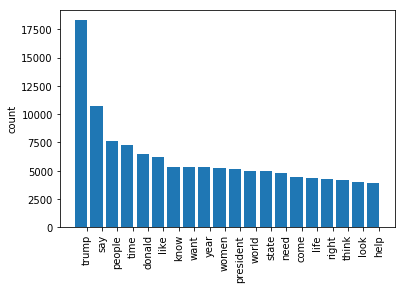

In [5]:
plotWordFreq(listOfWords, 20)

Here are the most common 20 bigrams observed in the entire dataset:

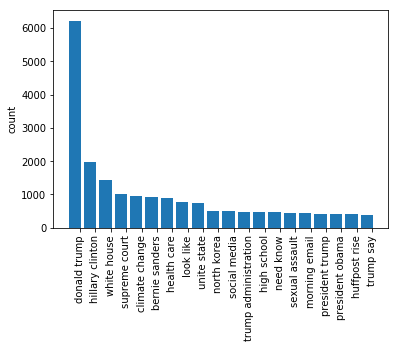

In [6]:
#get bigrams
ngrams = ngrams(listOfWords, 2)
bigrams = []
for i in range(len(ngrams)):
    bigrams.append(ngrams[i][0] + " " + ngrams[i][1])
del ngrams 

#plot histogram of most frequent bigrams
plotWordFreq(bigrams, 20)   
    

TFIDF Analysis of News Articles:

In [9]:
#calculate tdidf for every news article
dictionary = gensim.corpora.Dictionary(listOfListOfWords)
bow_corpus = [dictionary.doc2bow(doc) for doc in listOfListOfWords]
tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]

Here are three news articles followed by the tfidf for the words in those articles. A higher tfidf score for a word indicates a rare word that is uniquely representative of that particular article:

In [13]:
print(aggText[1])
printTFIDF(corpus_tfidf, 1)

Will Smith Joins Diplo And Nicky Jam For The 2018 World Cup's Official Song. Of course it has a song.
course: 0.2530779098452247
diplo: 0.46627461391857233
join: 0.23822129271865264
nicky: 0.4590466367220926
official: 0.25332709930007374
smith: 0.2852487089764458
song: 0.5304125400217264


In [14]:
print(aggText[2])
printTFIDF(corpus_tfidf, 2)

Hugh Grant Marries For The First Time At Age 57. The actor and his longtime girlfriend Anna Eberstein tied the knot in a civil ceremony.
actor: 0.2119667462285322
anna: 0.29040864170933534
ceremony: 0.2669209854072621
civil: 0.21667456371081076
eberstein: 0.4657873868253694
girlfriend: 0.26411224167853314
grant: 0.2539465865993043
hugh: 0.3046330336793549
knot: 0.3224741722416169
longtime: 0.29040864170933534
marry: 0.23760053499178296
tie: 0.2240302432554473


In [15]:
print(aggText[500])
printTFIDF(corpus_tfidf, 500)

White House Eliminates Cyber Czar Post After First Appointee Leaves. “I don’t see how getting rid of the top cyber official in the White House does anything to make our country safer from cyber threats,” Mark Warner, the top Democrat on the Senate Intelligence committee, said.
leave: 0.1183929869080243
official: 0.15725995354674815
say: 0.07381376871342187
get: 0.11170258355442282
threats: 0.17886638185895287
country: 0.12191674778653501
house: 0.21636851562625845
white: 0.2238827009569667
committee: 0.1664197498332014
senate: 0.13362693514497678
post: 0.1308276437574102
mark: 0.14906770990997462
intelligence: 0.1757778659985936
appointee: 0.2544082654501453
cyber: 0.6253435026155456
czar: 0.2529880962111868
democrat: 0.17538975764294717
eliminate: 0.19654582435731077
safer: 0.20967360249514738


LDA topics:

Here are 10 topics that are observed along with the words that appear on those topics seen in all articles:

In [16]:
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=10, id2word=dictionary, passes=2, workers=2)
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.012*"live" + 0.012*"people" + 0.009*"love" + 0.008*"life" + 0.007*"learn" + 0.007*"social" + 0.006*"world" + 0.006*"health" + 0.006*"media" + 0.005*"community"
Topic: 1 
Words: 0.014*"life" + 0.011*"school" + 0.010*"time" + 0.009*"women" + 0.008*"children" + 0.008*"need" + 0.008*"know" + 0.008*"think" + 0.007*"mother" + 0.007*"college"
Topic: 2 
Words: 0.013*"state" + 0.008*"right" + 0.006*"court" + 0.005*"government" + 0.005*"education" + 0.005*"public" + 0.005*"rule" + 0.004*"business" + 0.004*"americans" + 0.004*"plan"
Topic: 3 
Words: 0.009*"food" + 0.007*"like" + 0.006*"baby" + 0.006*"know" + 0.006*"good" + 0.005*"look" + 0.005*"ways" + 0.005*"things" + 0.005*"happiness" + 0.005*"make"
Topic: 4 
Words: 0.015*"police" + 0.012*"kill" + 0.009*"shoot" + 0.008*"say" + 0.007*"death" + 0.006*"officer" + 0.005*"ferguson" + 0.005*"arrest" + 0.005*"charge" + 0.005*"pope"
Topic: 5 
Words: 0.021*"obama" + 0.015*"house" + 0.013*"white" + 0.009*"people" + 0.009*"president" + 